## **Решение кейса №1**

### **Импорт библиотек**

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

### **Загрузка данных**

In [134]:
data_url: str = "https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv"

df: pd.DataFrame = pd.read_csv(data_url)

In [135]:
df.head()

,Payments,Costs,Profit,Age,Gender,AgeGroup
0,9400,8100,1300,19,male,18-24
1,26600,13900,12700,29,male,25-39
2,9750,6750,3000,20,male,18-24
3,29700,11200,18500,18,female,18-24
4,49700,10450,39250,21,female,18-24


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8715 entries, 0 to 8714
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Payments  8715 non-null   int64 
 1   Costs     8715 non-null   int64 
 2   Profit    8715 non-null   int64 
 3   Age       8715 non-null   int64 
 4   Gender    8715 non-null   object
 5   AgeGroup  8715 non-null   object
dtypes: int64(4), object(2)
memory usage: 408.6+ KB


Итого имеем изначальный размер датасета в 8715 записей, перейдем к чистке данных.

### 01. **Обработка данных**

In [137]:
df.loc[:, "Payments": "Age"].quantile([0, 0.25, 0.5, 0.75, 1])

,Payments,Costs,Profit,Age
0.00,3750.0,3500.0,-9643950.0,18.0
0.25,10800.0,8350.0,2500.0,18.0
0.50,19850.0,11450.0,7850.0,19.0
0.75,40050.0,15350.0,23750.0,25.0
1.00,6654600.0,9661700.0,6643950.0,49.0


Как можно заметить, датасет имеет сильные выбросы, устраним их

In [138]:
df = df.loc[
    (df["Profit"].between(df["Profit"].min(), df["Profit"].max(), inclusive="neither")), :
]

Приведем столбец `gender` и `AgeGroup` к категориальному типу

In [139]:
df["Gender"] = pd.Categorical(df["Gender"], ["male", "female"])
df["AgeGroup"] = pd.Categorical(df["AgeGroup"], ["18-24", "25-39", "40+"])

### 02. **Первичный анализ данных**

**1. Кол-во клиентов**

In [140]:
df.__len__()

8713

**2. Прибыль от одного клиента**

In [141]:
df["Profit"].mean()

np.float64(15755.095833811545)

Заметим, что привлечение одного клиента в среднем составляет 15000, значит, прибыль с одного имеющегося клиента покрывает расходы на привлечение нового, оставляя прибыль в размере $$\approx\frac{15747-15000}{15747}=5.3\%$$ от общих затрат, что прямым образом говорит о том, что вкладываться в привлечение - выгодно.

### 03. **Поиск среди мужчин 18-24 лет и женщин 18-24 лет**

In [142]:
work_df_piece: pd.DataFrame = df.loc[df["AgeGroup"] == "18-24"].groupby(["Gender", "AgeGroup"], observed=True).mean()["Profit"]
work_df_piece.head()

Gender  AgeGroup
male    18-24       13155.762435
female  18-24       26278.373894
Name: Profit, dtype: float64

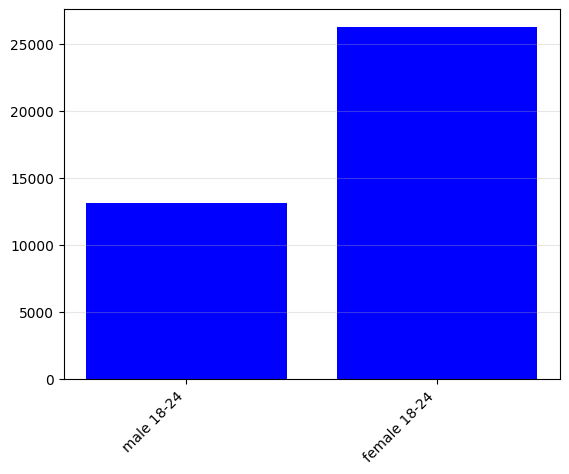

In [143]:
plt.bar(list(map(lambda label: " ".join(label), work_df_piece.index)), work_df_piece, color=[
    "b" if x > 0 else "r" for x in work_df_piece
])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

Получаем, что вкладываться в привлечении пользователей-женщин в возрасте от 18 до 24 лучше, чем мужчин того же возраста. Прибыль в таком случае составит: $$\approx 1\;000\cdot(26\;200-15\;000)=\boxed{11\;200\;000}$$

### 04. **Поиск среди всех половозрастных структур**

In [144]:
work_df: pd.DataFrame = df.groupby(["Gender", "AgeGroup"], observed=True).mean()["Profit"]
work_df.head()

Gender  AgeGroup
male    18-24       13155.762435
        25-39        7927.821394
        40+           184.210526
female  18-24       26278.373894
        25-39        8094.973545
Name: Profit, dtype: float64

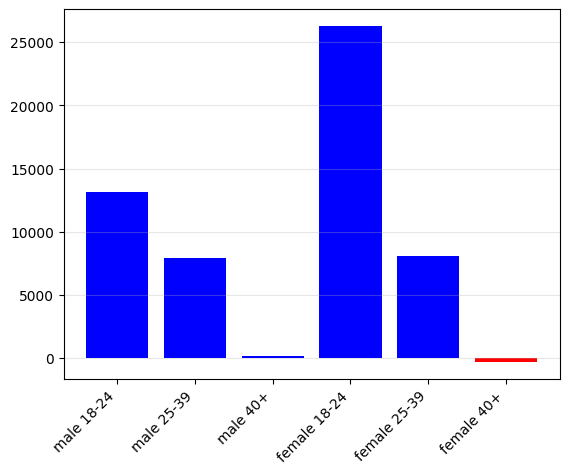

In [145]:
plt.bar(list(map(lambda label: " ".join(label), work_df.index)), work_df, color=[
    "b" if x > 0 else "r" for x in work_df
])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

Получили схожие с п.3 результаты: очевидное лидерство составила группа женщин в возрасте от 18-24 лет. Складывается впечатление, что это и есть "золотая жила".

In [146]:
gold_df = df.groupby(["Gender", 'Age'], observed=True)['Profit'].agg(
    [('Profit', 'mean'),]
).round(2)
gold_df

Profit
Gender Age          
male   18    2096.67
       19    2040.10
       20    1919.85
       21   78856.54
       22   80067.00
       23   80548.24
       24   78583.70
       25    7534.00
       26    7684.18
       27    7850.96
       28    7880.12
       29    7741.45
       30    7540.59
       31    8185.80
       32    9084.57
       33    7251.41
       34    8250.00
       35    7691.67
       36    7998.25
       37    7822.86
       38    8326.19
       39    9033.33
       40    -230.00
       41    2175.00
       42    -250.00
       43      75.00
       45    -650.00
       49   -2150.00
female 18   24962.39
       19   25286.65
       20   25537.50
       21   29843.44
       22   29493.50
       23   32582.73
       24   29268.64
       25    8164.80
       26    8562.76
       27    8016.81
       28    7005.95
       40    -642.50
       41    -386.11
       42    -283.33
       43    -250.00
       44     -16.67
       45      -7.14
       46     333.33
       48   -1200.00
       49    -266.67

In [147]:
gold_male_df = gold_df.xs("male", level=0)
gold_male_df.max()

Profit    80548.24
dtype: float64

In [148]:
gold_female_df = gold_df.xs("female", level=0)
gold_female_df.max()

Profit    32582.73
dtype: float64

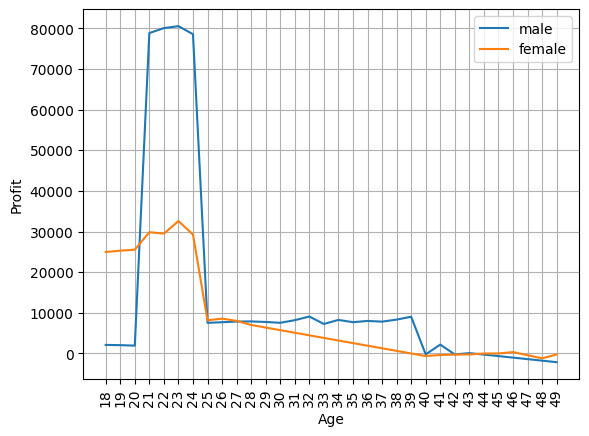

In [150]:
# male
plt.plot(gold_male_df.index, gold_male_df["Profit"], label="male")

# female
plt.plot(gold_female_df.index, gold_female_df["Profit"], label="female")

plt.grid(visible=True, which='both')
plt.xticks(range(18, 50), rotation=90)
plt.yticks(range(0, 85_000, 10_000))
plt.xlabel("Age")
plt.ylabel("Profit")
plt.legend()
plt.show()

На данной диаграмме видно, что мужчины, в возрасте от 21 до 24 лет и есть та самая золотая жила: средняя прибыль с одного человека этой категории составляет $\approx 80\;500$ (!), если вложить все средства на привлечении пользователей данной категории, то компания сможет заработать невероятные: $$1\;000 \cdot(80\;500-15;000)=\boxed{65\;000\;000}$$
Причина, по которой данная группа была пропущена в п.3-4, состоит в том, что искомая группа не являлась подгруппой предложенных, а находилась на их пересечении, поэтому настоящая ценность делилась пополам.

Среди других таких "золотых жил" стоит выделить группу женщин в возрасте от 21 до 24 - это вторая по прибыльности группа $\approx 31\;000$ прибыли за человека.